In [1]:
##############################################################
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt

##############################################################
def get_fname(patient, is_mask = False):
    fpath = os.path.join(FP_LGG, patient)
    if is_mask:
        pattern = "_([^_]*)_mask.tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" in x])
    else:
        pattern = "_([^_]*).tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" not in x])
    index = np.array([int(re.findall(pattern, x)[0]) for x in fname])
    idx = np.argsort(index)
    return fname[idx]

##############################################################
FP_LGG = "/data/Duke_BIOS824/LGG-segmentation/"
patients = [x for x in os.listdir(FP_LGG) if "TCGA" in x]    

##############################################################
img_slice, img_mask = dict(), dict()

for patient in patients:
    lst = get_fname(patient, is_mask = True)
    img = [plt.imread(os.path.join(FP_LGG, patient, fname)) for fname in lst]
    img_mask[patient]  = np.array(img)

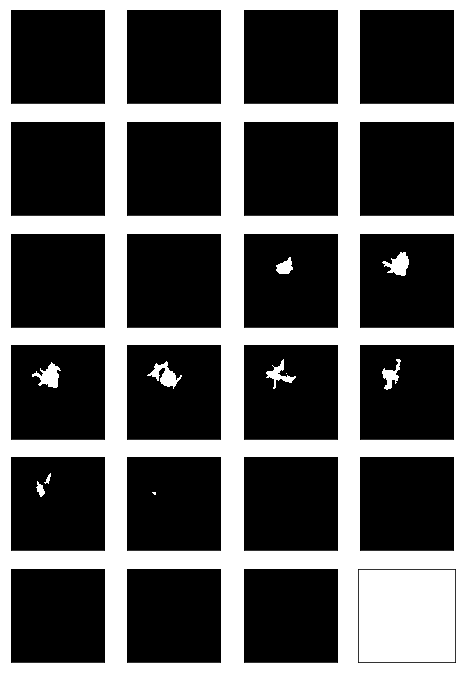

In [2]:
##############################################################
fig, axes = plt.subplots(ncols=4, nrows=6, figsize = (2*4, 2*6))
axes = axes.ravel()

patient = 'TCGA_CS_4941_19960909'
mask    = img_mask[patient]
num_img = mask.shape[0]

for idx in range(num_img):
    axes[idx].imshow(mask[idx], cmap = "gray")

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

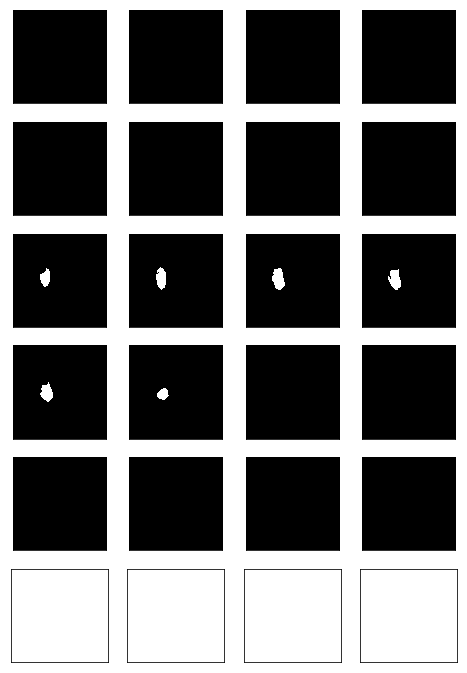

In [3]:
##############################################################
fig, axes = plt.subplots(ncols=4, nrows=6, figsize = (2*4, 2*6))
axes = axes.ravel()

patient = patients[1]
mask    = img_mask[patient]
num_img = mask.shape[0]

for idx in range(num_img):
    axes[idx].imshow(mask[idx], cmap = "gray")

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [4]:
for patient in patients:
    print(patient)

TCGA_CS_4941_19960909
TCGA_CS_4942_19970222
TCGA_CS_4943_20000902
TCGA_CS_4944_20010208
TCGA_CS_5393_19990606
TCGA_CS_5395_19981004
TCGA_CS_5396_20010302
TCGA_CS_5397_20010315
TCGA_CS_6186_20000601
TCGA_CS_6188_20010812
TCGA_CS_6290_20000917
TCGA_CS_6665_20010817
TCGA_CS_6666_20011109
TCGA_CS_6668_20011025
TCGA_CS_6669_20020102
TCGA_DU_5849_19950405
TCGA_DU_5851_19950428
TCGA_DU_5852_19950709
TCGA_DU_5853_19950823
TCGA_DU_5854_19951104
TCGA_DU_5855_19951217
TCGA_DU_5871_19941206
TCGA_DU_5872_19950223
TCGA_DU_5874_19950510
TCGA_DU_6399_19830416
TCGA_DU_6400_19830518
TCGA_DU_6401_19831001
TCGA_DU_6404_19850629
TCGA_DU_6407_19860514
TCGA_DU_6408_19860521
TCGA_DU_7008_19830723
TCGA_DU_7010_19860307
TCGA_DU_7013_19860523
TCGA_DU_7014_19860618
TCGA_DU_7018_19911220
TCGA_DU_7019_19940908
TCGA_DU_7294_19890104
TCGA_DU_7298_19910324
TCGA_DU_7299_19910417
TCGA_DU_7300_19910814
TCGA_DU_7301_19911112
TCGA_DU_7302_19911203
TCGA_DU_7304_19930325
TCGA_DU_7309_19960831
TCGA_DU_8162_19961029
TCGA_DU_81

In [ ]:
for patient in patients:
###
x_c = list(np.arange(0, 256, 3))
y_c = list(np.arange(0, 256, 3))
z_c = list(range(23))

###
x_c, y_c, z_c = np.meshgrid(x_c, y_c, z_c)
x_c = x_c.ravel()
y_c = y_c.ravel()
z_c = z_c.ravel()

###
cord = np.array([
    (x, y, z, img[x, y, z]) 
    for x, y, z in zip(x_c, y_c, z_c)
    if img[x, y, z] > 0
])

###
cord = pd.DataFrame(cord, columns=["x", "y", "z", "val"])
print(cord.shape)
cord.head()